In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp

from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer, accuracy_score, balanced_accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

import xgboost as xgb

from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

%matplotlib inline

In [108]:
cancer = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')

In [109]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [110]:
cancer.set_index('id', inplace=True)
cancer.drop('Unnamed: 32', axis=1, inplace=True)

In [111]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [112]:
cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [113]:
num_var = list(cancer.select_dtypes('number').columns)

In [114]:
(cancer.isnull().sum() / cancer.shape[0]) * 100

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

# **Exploratory Data Analysis (EDA)**

<AxesSubplot:>

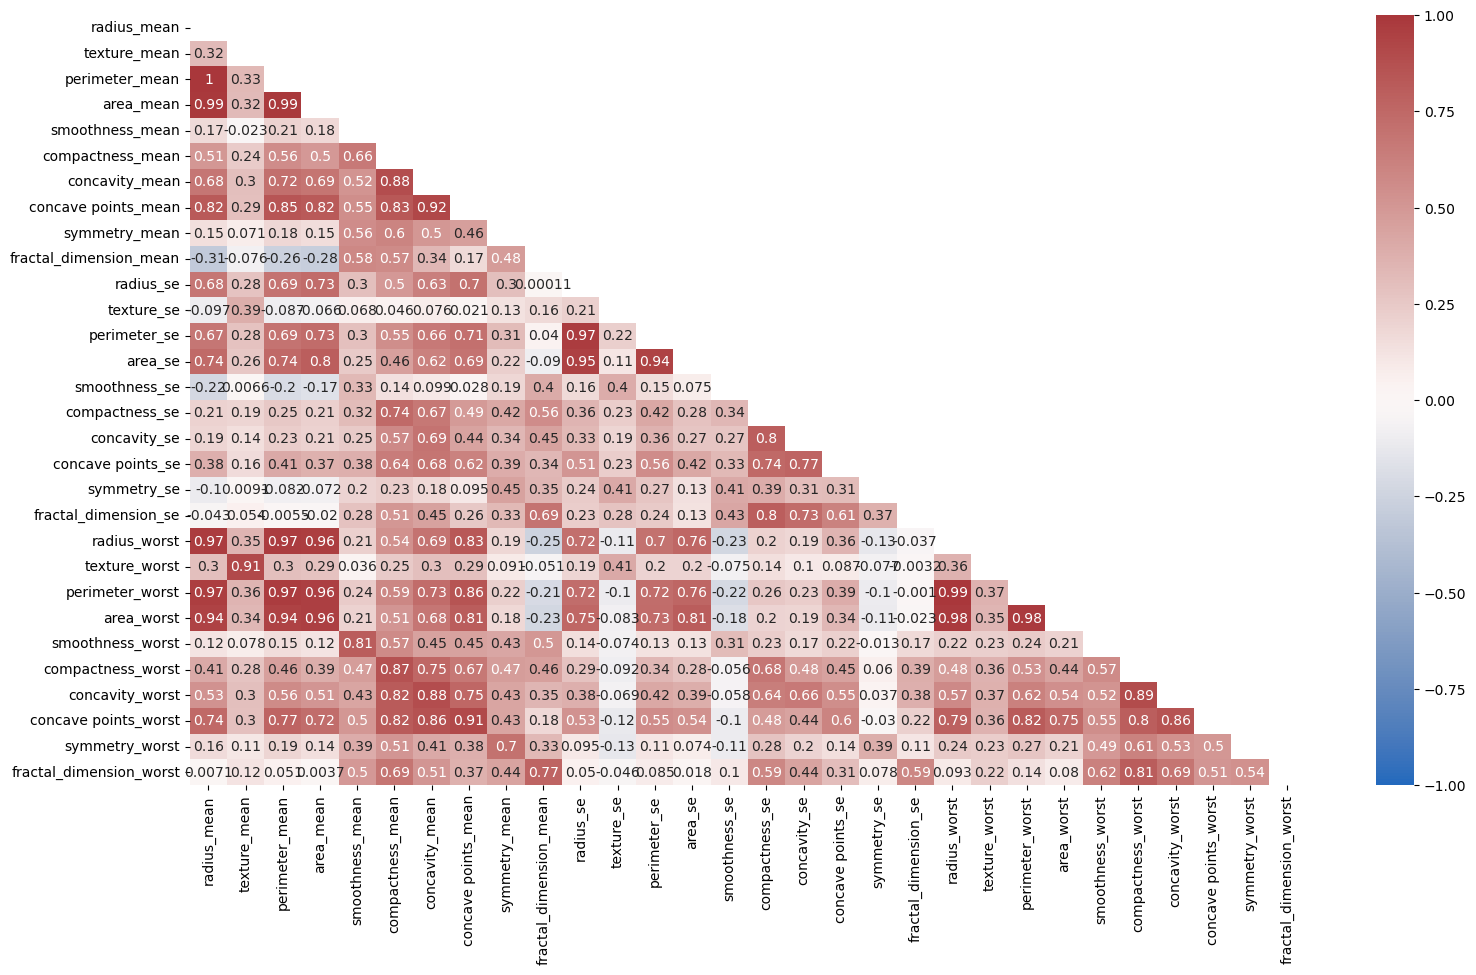

In [115]:
plt.figure(figsize=(18,10))
sns.heatmap(cancer.corr(), vmin=-1, vmax=1, annot=True,
            mask=np.triu(cancer.corr()), cmap=sns.color_palette("vlag", as_cmap=True))

In [116]:
diagnosis_counts = cancer.groupby(by=['diagnosis']).size().reset_index(name='count')
config = {'displayModeBar': False}
fig = px.bar(diagnosis_counts, x='diagnosis', y='count', color='diagnosis', template='ggplot2')
fig.show(config=config)

In [117]:
benign = cancer[cancer['diagnosis'] == 'B']
malignant = cancer[cancer['diagnosis'] == 'M']

fig = None
for i, colname in enumerate(num_var):
    # Create histogram for each class
    hist_data = [benign[colname], malignant[colname]]
    group_labels = ['Benign', 'Malignant']
    colors = ['#7fc97f', '#beaed4']
    if i % 3 == 0:
        if fig:
            fig.update_layout(showlegend=True)
            fig.update_yaxes(title_text='count', row=1, col=1) # Add common y axis label
            fig.show(config=config)
        fig = sp.make_subplots(rows=1, cols=3, subplot_titles=num_var[i:i+3])
    fig.add_trace(go.Histogram(x=hist_data[0], name=group_labels[0], marker_color=colors[0]), row=1, col=i % 3 + 1)
    fig.add_trace(go.Histogram(x=hist_data[1], name=group_labels[1], marker_color=colors[1]), row=1, col=i % 3 + 1)
    fig.update_xaxes(title_text=colname, row=1, col=i % 3 + 1)

In [118]:
cols = cancer.loc[:,'radius_mean':'fractal_dimension_worst'].columns
n_rows = (len(cols) + 2) // 3
fig = sp.make_subplots(rows=n_rows, cols=3, subplot_titles=cols)

for i, col in enumerate(cols):
    row = (i // 3) + 1
    col_num = (i % 3) + 1
    box = go.Box(x=cancer['diagnosis'], y=cancer[col], name=col)
    fig.add_trace(box, row=row, col=col_num)

fig.update_layout(height=n_rows*400, showlegend=False)
fig.show(config=config)

## **Principal Components Analysis**

In [119]:
X_pca, y_pca = cancer.select_dtypes('number'), cancer['diagnosis']
X_pca.shape, y_pca.shape

((569, 30), (569,))

In [120]:
pca = PCA(n_components=3) # instanciation de l'objet pca
scaler_pca = StandardScaler() # instanciation de l'objet scaler_pca 
X_scaled_pca = scaler_pca.fit_transform(X_pca) # normalisation centrée-réduite
X_transformed_pca = pca.fit_transform(X_scaled_pca) # réalisation de l'ACP sur les données X_scaled_pca

In [121]:
total_var = pca.explained_variance_ratio_.sum() * 100

In [122]:
# Récupération des ratios de variance expliquée
variance_ratios = pca.explained_variance_ratio_

# Tri des ratios par ordre décroissant
variance_ratios_sorted = sorted(variance_ratios, reverse=True)

# Création de la trace pour le graphique en barres
trace = go.Bar(x=list(range(1, len(variance_ratios) + 1)),
               y=variance_ratios_sorted)

# Création de la mise en page de la figure
layout = go.Layout(title='Explained Variance Ratio of PCA Components',
                   xaxis=dict(title='PCA Component'),
                   yaxis=dict(title='Explained Variance Ratio'))

# Création de la figure
fig = go.Figure(data=[trace], layout=layout)

# Affichage de la figure
fig.show(config=config)

In [123]:
fig = px.scatter(X_transformed_pca, x=0, y=1, color=cancer['diagnosis'],
                 title=f'Total Explained Variance: {total_var:.2f}%',
                labels={'0': 'PC1','1': 'PC2', 'color':'diagnosis'})
fig.show(config=config)

In [124]:
fig = px.scatter_3d(
    X_transformed_pca, x=0, y=1, z=2, color=cancer['diagnosis'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3', 'color':'diagnosis'})
fig.show(config=config)

# **Data Processing**

In [125]:
def pipeline(model):
    num_features_standard = num_var
    numeric_transformer  = Pipeline(steps=[
                         ('standard_scaler', RobustScaler())])
    preprocessor = ColumnTransformer(
      transformers=[
                 ('num', numeric_transformer, num_features_standard)])
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    return pipe

In [126]:
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    model_acc = balanced_accuracy_score(y_test, y_pred)
    print("Balanced accuracy ({}): {:.2f}%".format(model_name, model_acc * 100))
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [127]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
    scoring=make_scorer(balanced_accuracy_score))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [128]:
def plot_feature_importance(model, X_train, name):
    # Récupérer les importances des variables et les noms des variables
    importances = model.named_steps['classifier'].feature_importances_
    feature_names = X_train.columns
    
    # Créer un dataframe trié par ordre décroissant d'importance
    df_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
    df_importances = df_importances[df_importances['importance'] != 0]  # Filtre les variables ayant une importance nulle
    df_importances = df_importances.sort_values(by='importance', ascending=False)
    df_importances = df_importances.iloc[:10]  # Garde uniquement les 10 premières variables
    
    # Créer la figure Plotly avec la liste triée des noms de variables
    fig = go.Figure([go.Bar(x=df_importances['feature'], y=df_importances['importance'])])
    fig.update_layout(title=name + " " + "Feature Importance")
    fig.show(config=config)

In [129]:
def plot_first_trees(model, num_var):
    # Afficher les trois premiers arbres
    for i in range(3):
        plt.figure(figsize=(15, 10))
        tree.plot_tree(model.named_steps['classifier'][i], filled=True, feature_names=num_var)
        plt.show()

In [130]:
from sklearn.metrics import precision_recall_curve, auc

def plot_pr_curve(model, name):
    y_score = model.predict_proba(X)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y, y_score)
    auprc = auc(recall, precision)

    fig = px.area(
        x=recall, y=precision,
        title=f'Precision-Recall Curve (AUPRC={auprc:.4f})',
        labels=dict(x='Recall', y='Precision'),
        width=700, height=500
    )
    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show(config=config)

In [131]:
def randomized_search_cv(model, param_grid, cross_val, X_train, y_train):
    clf = RandomizedSearchCV(model, param_grid, cv=cross_val, n_jobs=-1,
                             scoring=make_scorer(balanced_accuracy_score),
                             n_iter=5, verbose=1)
    clf.fit(X_train, y_train)
    return clf

# **Modélisation**

In [132]:
X = cancer.select_dtypes('number')
y = cancer['diagnosis'].replace({'B': 0, 'M': 1})

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=42)

In [134]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [135]:
kfold = KFold(n_splits=10) # Cross-Validation

# **Logistic Regression**

In [136]:
param_grid_lr = {
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver': ['newton-cg','sag', 'saga'],
    'classifier__max_iter': [100, 500, 1000]
}

In [137]:
clf_lr = randomized_search_cv(pipeline(LogisticRegression(tol=1e-2,
                                                         class_weight='balanced',  penalty='l2',
                                                         multi_class='ovr', random_state=42)),
                              param_grid_lr, kfold ,X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [138]:
lr = clf_lr.best_estimator_
lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (LogisticRegression): 98.28%


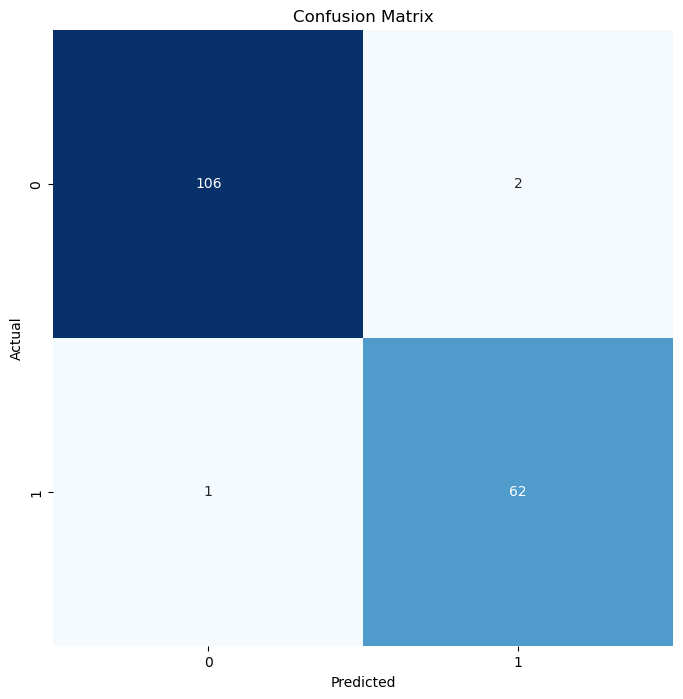

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [139]:
evaluate_model(lr,'LogisticRegression', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

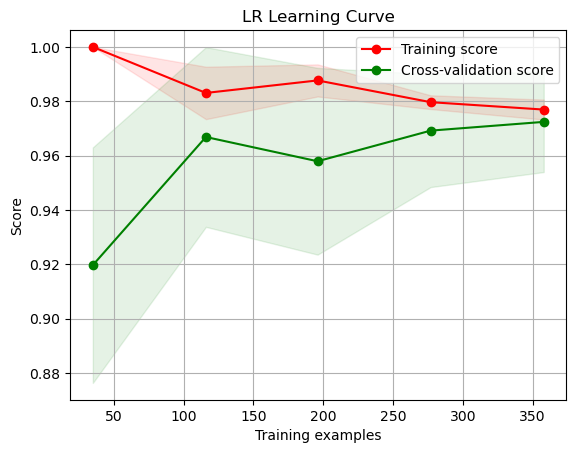

In [140]:
# Logistic Regression - Learning Curve 
plot_learning_curve(estimator=lr,title="LR Learning Curve",
                    X=X_train, y=y_train, cv=kfold)

In [141]:
# Récupérer les coefficients
coefficients = lr.named_steps['classifier'].coef_[0]
feature_names = X.columns

# Trier les coefficients par ordre croissant
sorted_indices = coefficients.argsort()

# Créer la figure Plotly
fig = go.Figure([go.Bar(x=coefficients[sorted_indices], y=feature_names[sorted_indices], orientation='h')])

fig.update_layout(title="Coefficients associés à chaque feature", xaxis_title="Coefficient")
fig.show(config=config)

# **Decision Tree Classifier**

In [142]:
param_grid_dtc = {
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7, 9, 11, 13],
    'classifier__min_samples_split': [2, 5, 10, 15, 20],
    'classifier__min_samples_leaf': [1, 2, 3, 4, 5]
}

In [143]:
clf_dtc = randomized_search_cv(pipeline(DecisionTreeClassifier(class_weight='balanced')),
                              param_grid_dtc, kfold, X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [144]:
dtc = clf_dtc.best_estimator_
dtc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (DecisionTreeClassifier): 95.11%


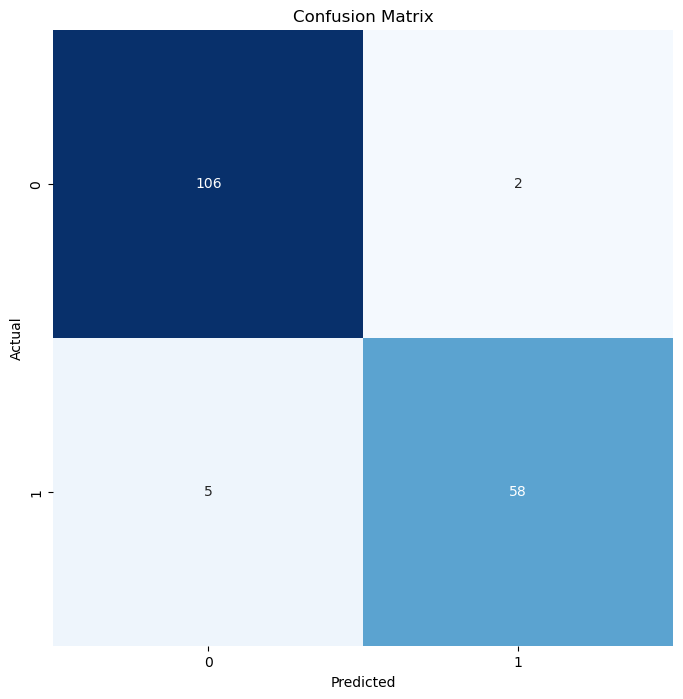

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [145]:
evaluate_model(dtc,'DecisionTreeClassifier', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

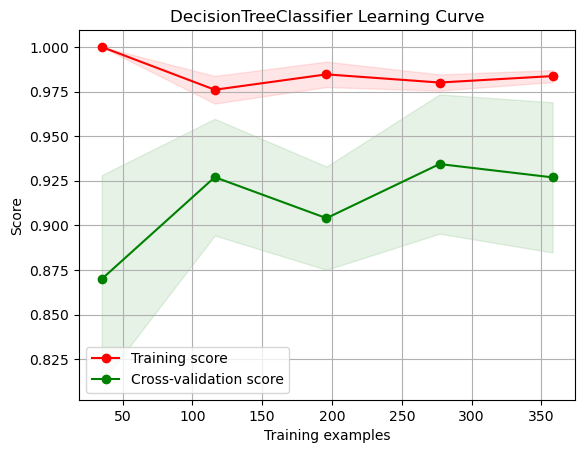

In [146]:
# DecisionTreeClassifier - Learning Curve 
plot_learning_curve(estimator=dtc,title="DecisionTreeClassifier Learning Curve",
                    X=X_train, y=y_train, cv=kfold)

In [147]:
plot_feature_importance(dtc, X_train, 'Decision Tree')

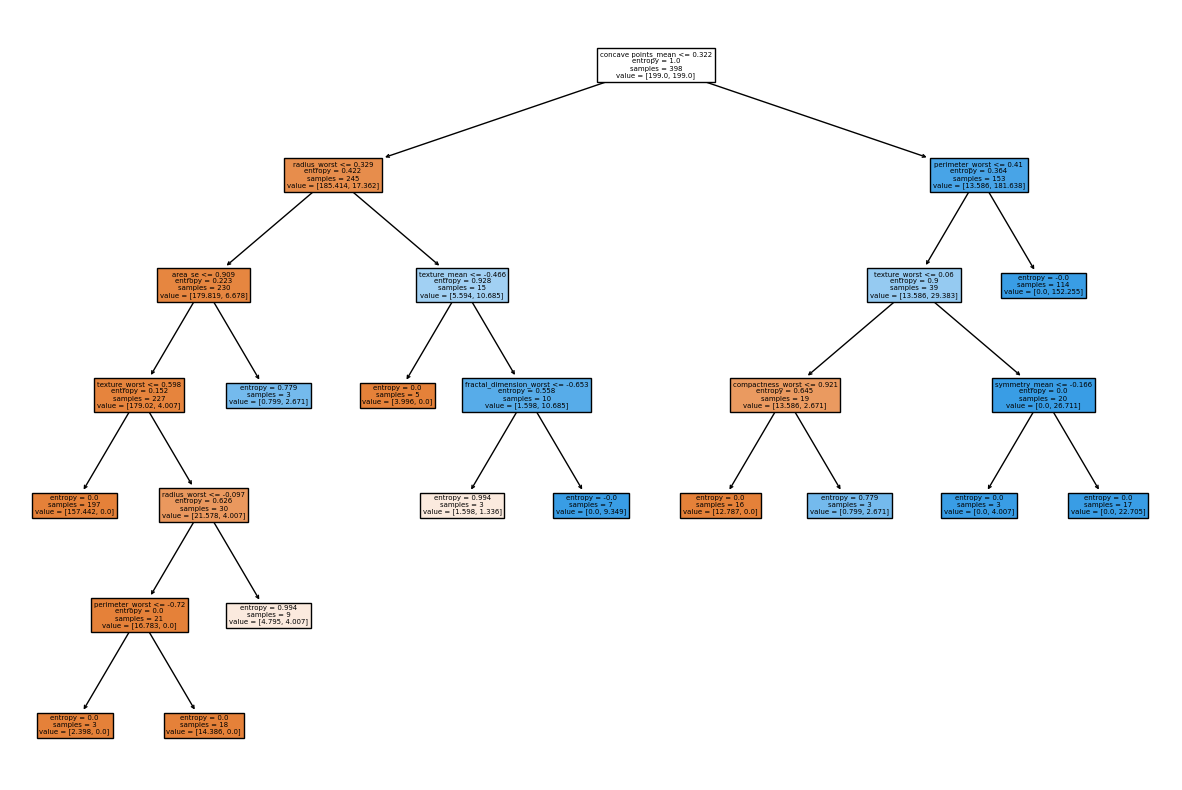

In [148]:
# Affiche l'arbre de décision
plt.figure(figsize=(15, 10))
tree.plot_tree(dtc.named_steps['classifier'], filled=True, feature_names=num_var)
plt.show()

# **Gradient Boosting Classifier**

In [149]:
param_grid_gbc = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__min_samples_leaf': [1, 3, 5],
    'classifier__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
}

In [150]:
clf_gbc = randomized_search_cv(pipeline(GradientBoostingClassifier()),
                              param_grid_gbc, kfold, X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [151]:
gbc = clf_gbc.best_estimator_
gbc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (GradientBoostingClassifier): 95.90%


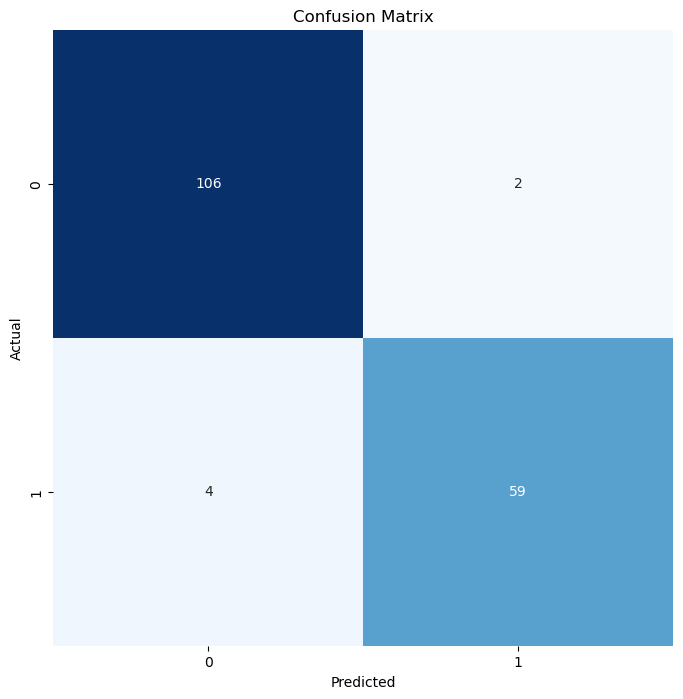

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [152]:
evaluate_model(gbc,'GradientBoostingClassifier', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

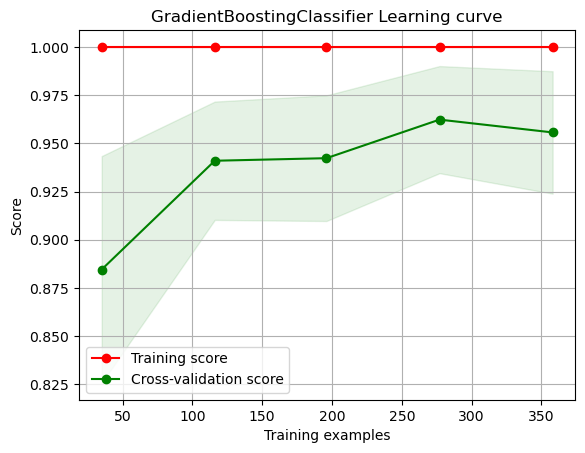

In [153]:
# Gradient Boosting Classifier - Learning Curve 
plot_learning_curve(estimator=gbc, title="GradientBoostingClassifier Learning curve",
                    X=X_train, y=y_train, cv=kfold)

In [154]:
plot_feature_importance(gbc, X_train, 'Gradient Boosting')

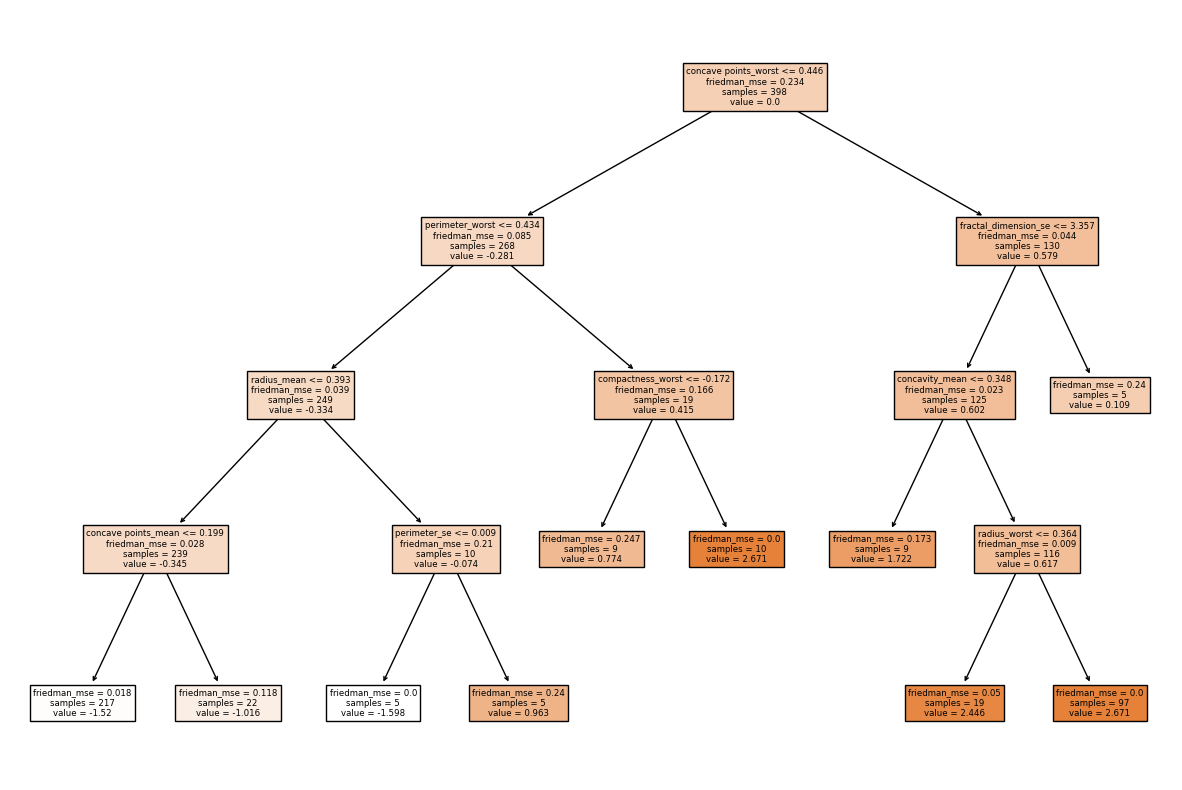

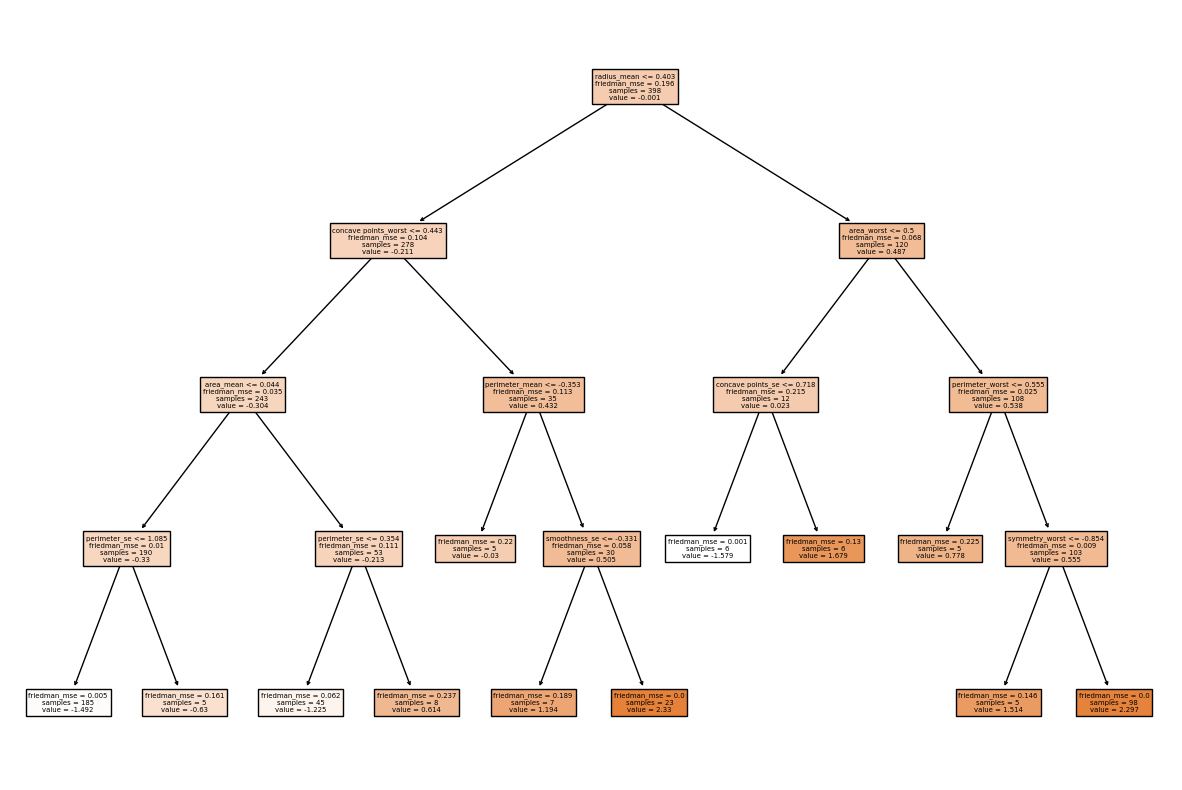

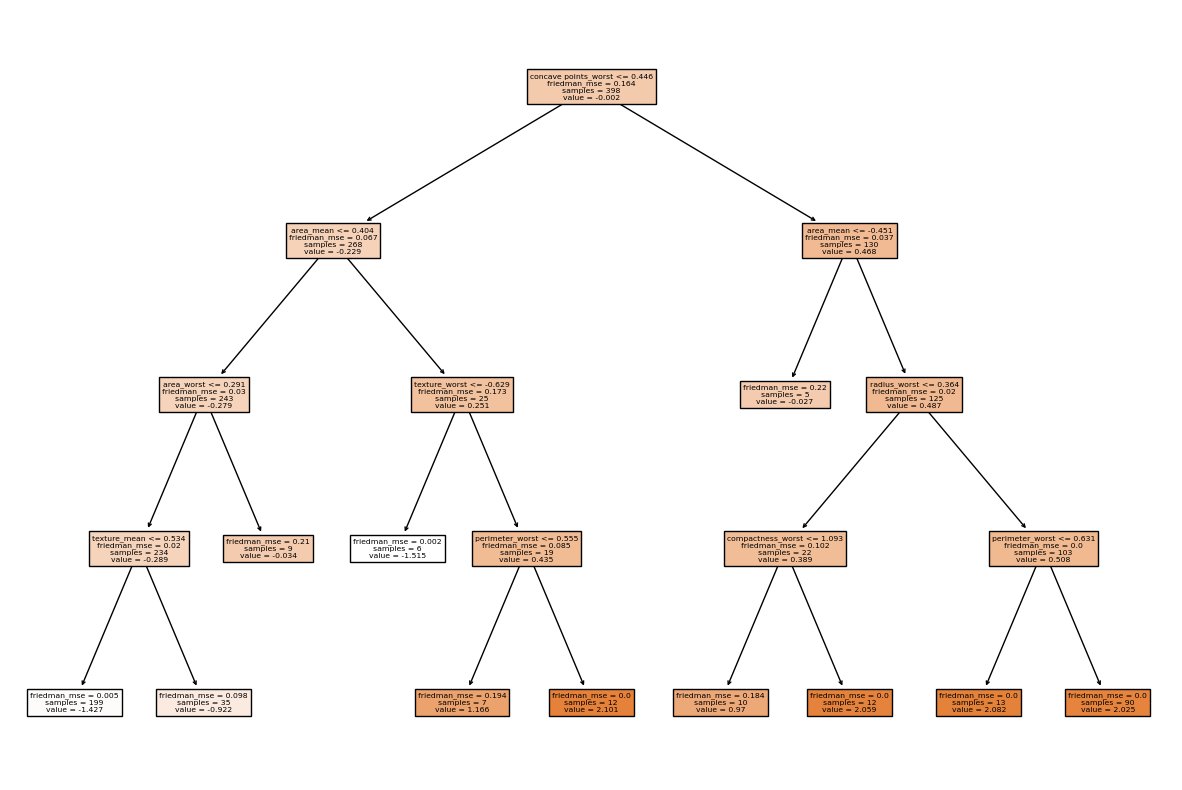

In [155]:
# Affiche les trois premiers arbres
for i in range(3):
    plt.figure(figsize=(15, 10))
    tree.plot_tree(gbc.named_steps['classifier'][i][0], filled=True, feature_names=num_var)
    plt.show()

# **Support Vector Classification**

In [156]:
param_grid_svc = {
    'classifier__C': [0.1, 1, 10, 100], 
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': ['scale', 'auto', 0.1, 1, 10, 100]
}

In [157]:
clf_svc = randomized_search_cv(pipeline(SVC(class_weight='balanced')),
                              param_grid_svc, kfold, X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [158]:
svc = clf_svc.best_estimator_
svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (SVC): 98.28%


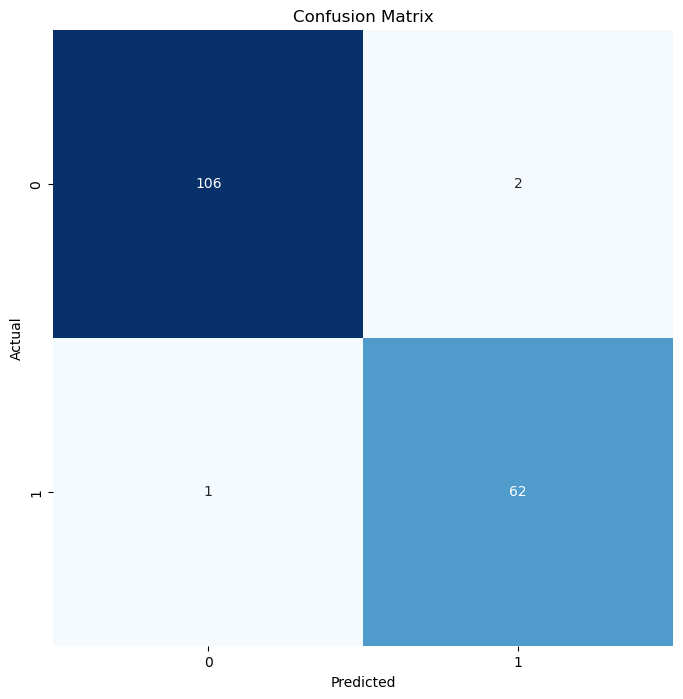

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [159]:
evaluate_model(svc,'SVC', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

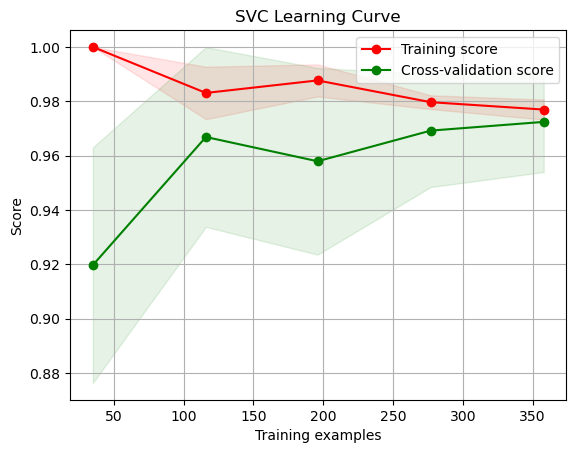

In [160]:
# SVC - Learning Curve 
plot_learning_curve(estimator=lr,title="SVC Learning Curve",
                    X=X_train, y=y_train, cv=kfold)

# **K-Nearest Neighbors**


In [161]:
param_grid_neigh = {
    'classifier__n_neighbors': np.arange(1, 25),
    'classifier__metric': ['euclidean', 'manhattan'],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2],
}

In [162]:
clf_neigh = randomized_search_cv(pipeline(KNeighborsClassifier()), param_grid_neigh, kfold ,X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [163]:
neigh = clf_neigh.best_estimator_
neigh

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (KNeighborsClassifier): 95.90%


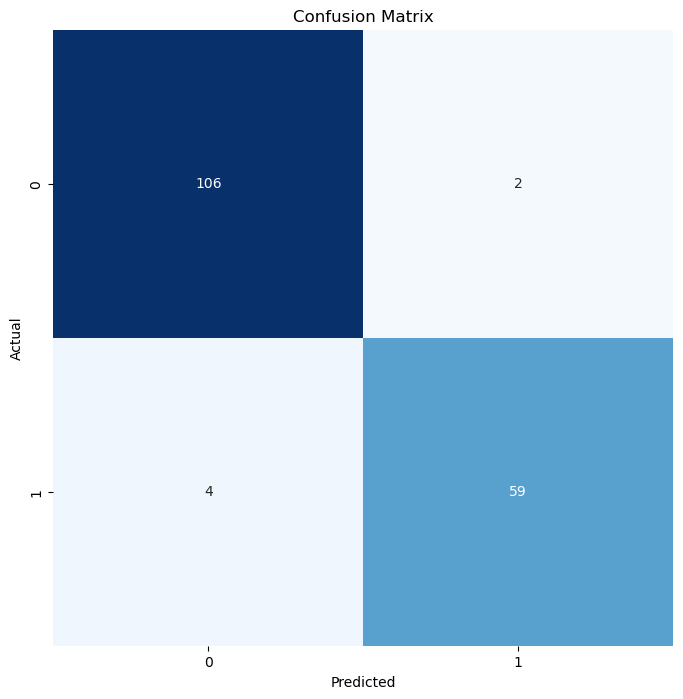

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [164]:
evaluate_model(neigh,'KNeighborsClassifier', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

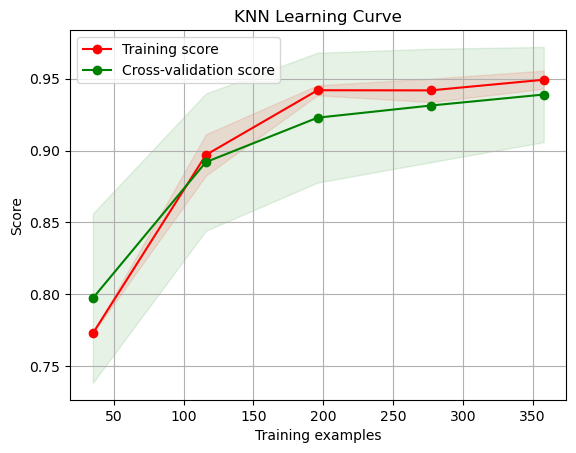

In [165]:
# K-Nearest Neighbors - Learning Curve 
plot_learning_curve(estimator=neigh,title="KNN Learning Curve",
                    X=X_train, y=y_train, cv=kfold)

In [166]:
f1_score(y_test, neigh.predict(X_test), average='weighted')

0.9647902680643603

In [167]:
balanced_accuracy_score(y_test, neigh.predict(X_test))

0.9589947089947091

# **Random Forest**

In [168]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 4, 6, 8, 10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 12, 15, 18, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [169]:
# Create the random grid
random_grid = {
               'classifier__n_estimators': n_estimators,
               'classifier__max_features':max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap
}

In [170]:
clf_rf = randomized_search_cv(pipeline(RandomForestClassifier(class_weight='balanced',
                                                             random_state=42)), random_grid, kfold ,X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [171]:
rf = clf_rf.best_estimator_
rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (RandomForestClassifier): 96.69%


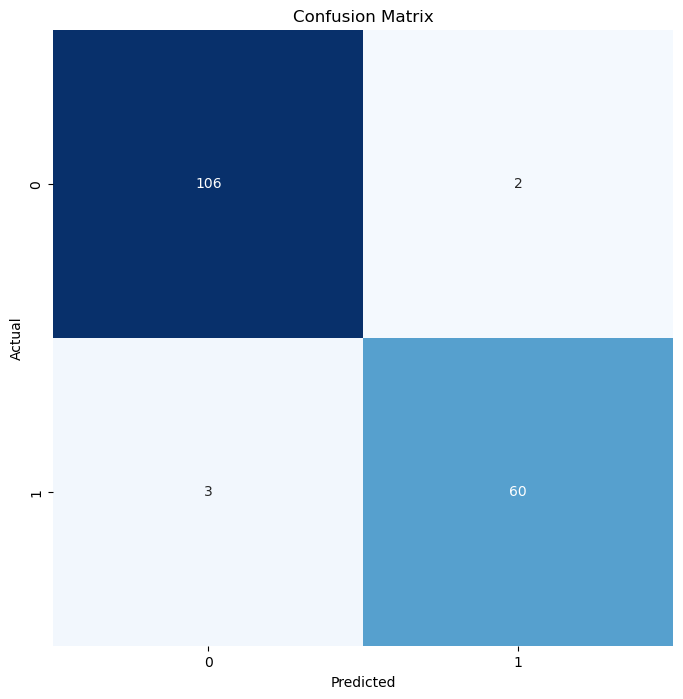

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [172]:
evaluate_model(rf,'RandomForestClassifier', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

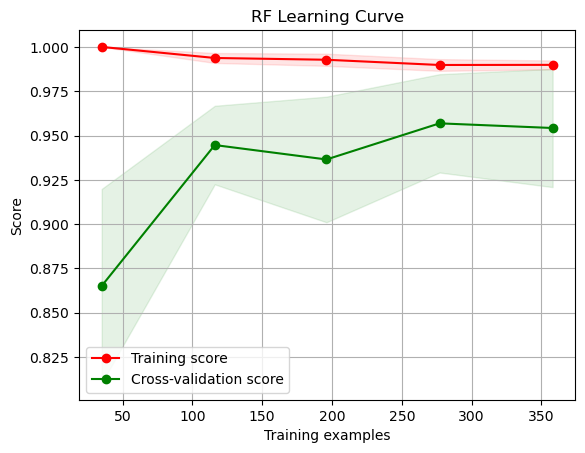

In [173]:
# Random Forest - Learning Curve 
plot_learning_curve(estimator=rf,title="RF Learning Curve",
                    X=X_train, y=y_train, cv=kfold)

In [174]:
plot_feature_importance(rf, X_train, 'Random Forest')

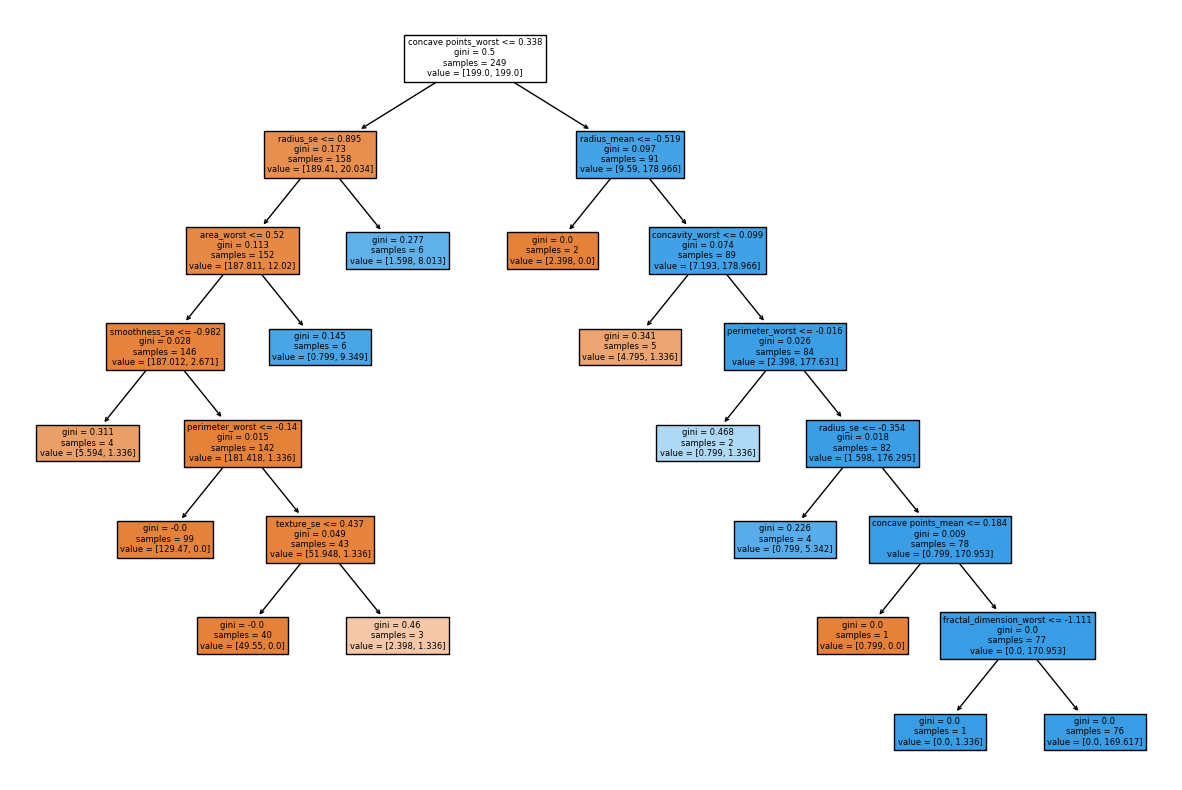

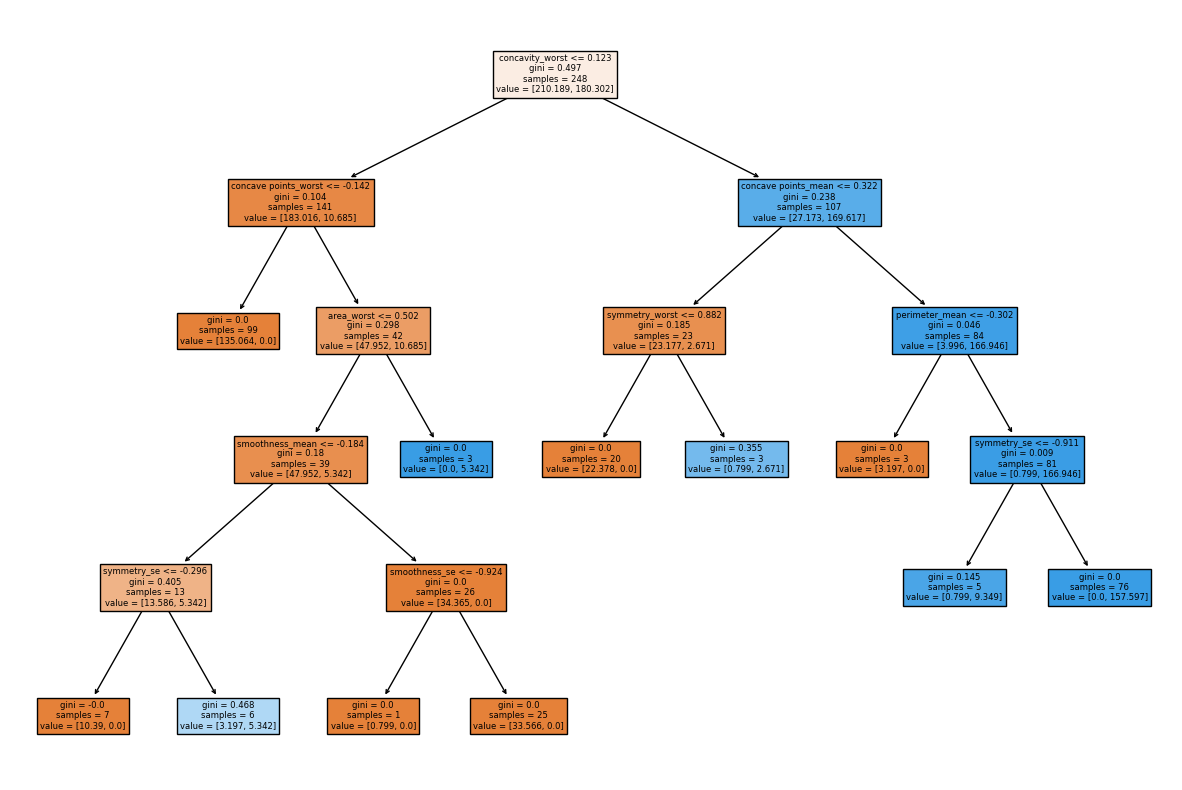

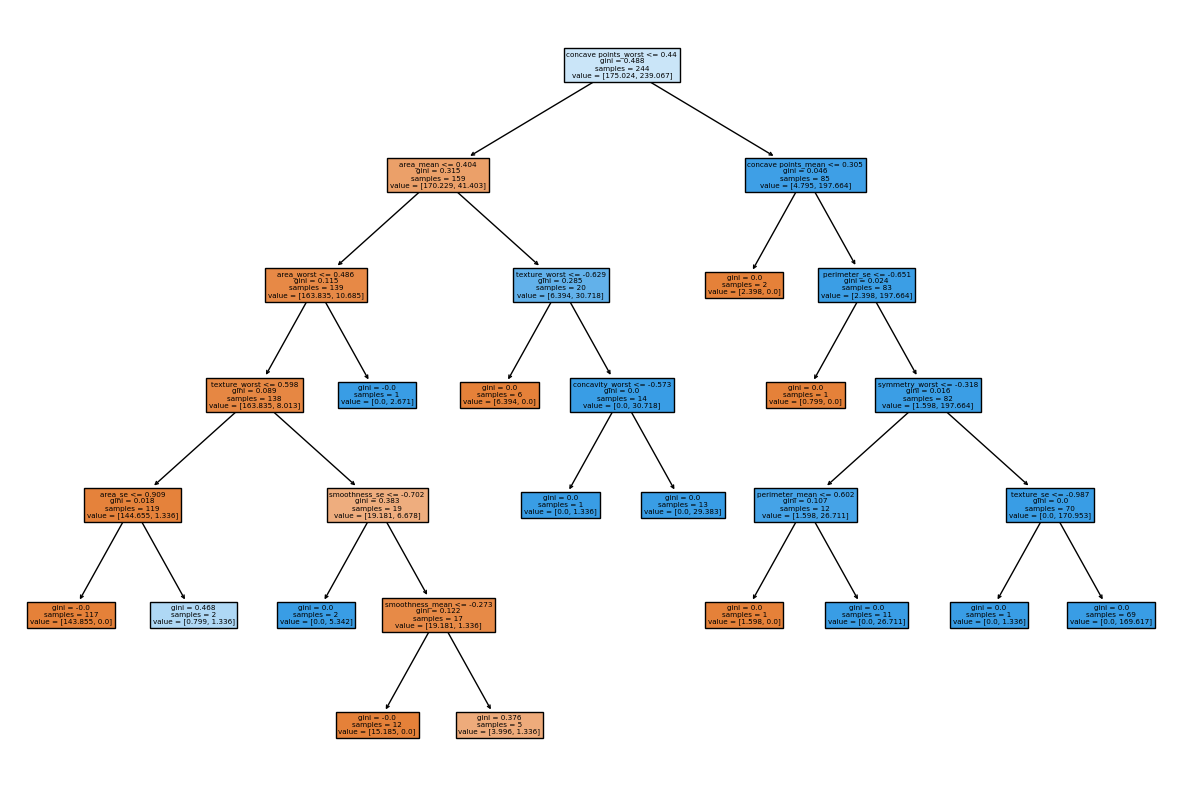

In [175]:
plot_first_trees(rf, num_var)

# **XGBoost Classifier**

In [176]:
param_grid_xgb = {
    'classifier__max_depth':np.arange(2, 10),
    # 'classifier__subsamples':np.arange(0.1, 1, 0.1),
    'classifier__n_estimators':np.arange(100, 500, 100),
    'classifier__learning_rate':np.arange(0.01, 0.1, 0.01)
}

In [177]:

clf_xgb = randomized_search_cv(pipeline(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                                                         random_state=42)),
                              param_grid_xgb, kfold, X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [178]:
best_xgb = clf_xgb.best_estimator_
best_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (XGBoostClassifier): 96.36%


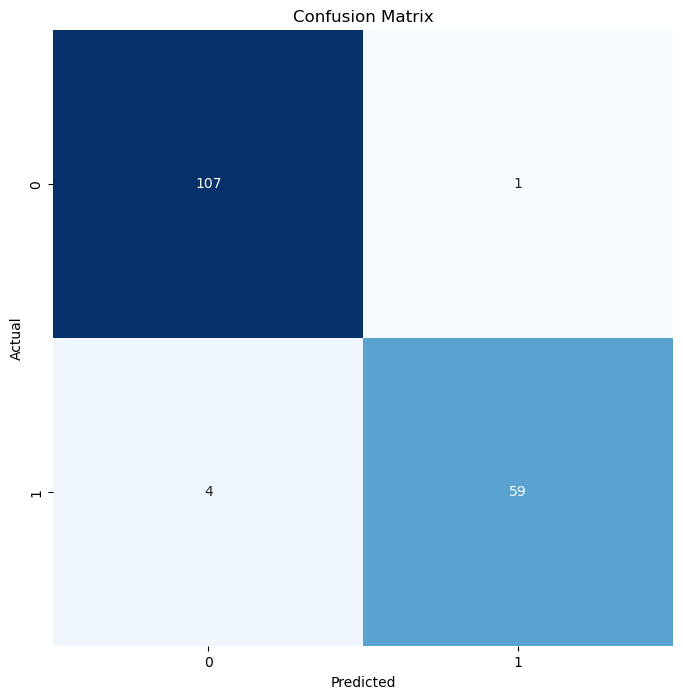

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [179]:
evaluate_model(best_xgb,'XGBoostClassifier', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

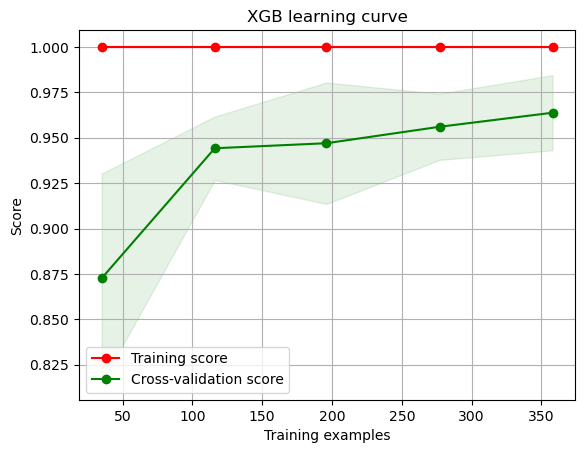

In [180]:
# XGBoost - Learning Curve 
plot_learning_curve(estimator=best_xgb, title="XGB learning curve",
                    X=X_train, y=y_train, cv=kfold)

In [181]:
plot_feature_importance(best_xgb, X_train, 'XGBoost')

In [182]:
mean_squared_error(y_test, best_xgb.predict(X_test), squared=False)

0.17099639201419234

In [183]:
mean_absolute_error(y_test, best_xgb.predict(X_test))

0.029239766081871343

In [184]:
f1_score(y_test, best_xgb.predict(X_test), average='weighted')

0.970603923775359

# **Gaussian Naive Bayes**

In [185]:
param_grid_gnb = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
    'classifier__priors': [None, [0.25, 0.75], [0.5, 0.5]]
}

In [186]:
clf_gnb = randomized_search_cv(pipeline(GaussianNB()),
                              param_grid_gnb, kfold, X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [187]:
gnb = clf_gnb.best_estimator_
gnb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (GaussianNB): 92.92%


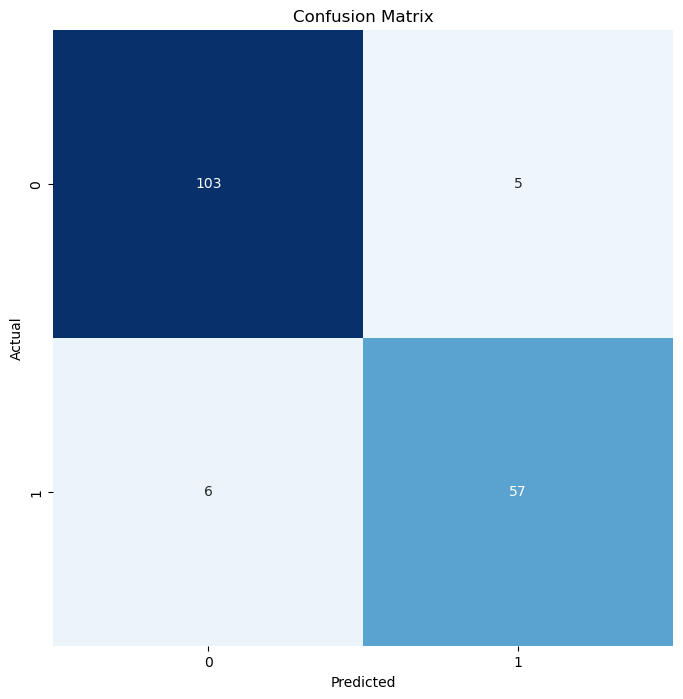

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [188]:
evaluate_model(gnb,'GaussianNB', X_test, y_test)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

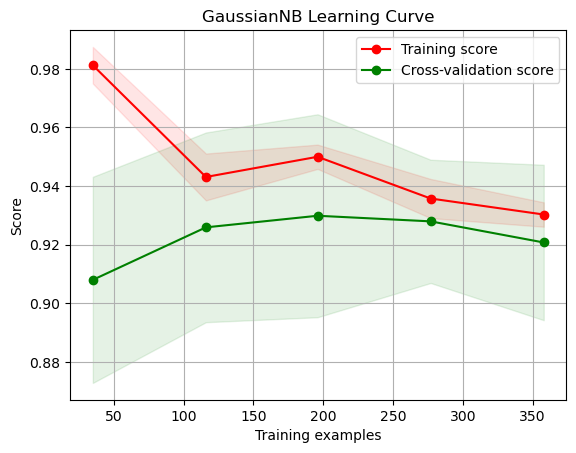

In [189]:
# GaussianNB - Learning Curve 
plot_learning_curve(estimator=gnb,title="GaussianNB Learning Curve",
                    X=X_train, y=y_train, cv=kfold)

# **Linear Discriminant Analysis**

In [190]:
param_grid_lda = {
    'classifier__solver': ['svd', 'lsqr', 'eigen'],
    'classifier__n_components': [None, 1],
    'classifier__shrinkage': ['auto', None]
}

In [191]:
clf_lda = randomized_search_cv(pipeline(LinearDiscriminantAnalysis()),
                              param_grid_lda, kfold, X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [192]:
lda = clf_lda.best_estimator_
lda

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   RobustScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                           

Balanced accuracy (LinearDiscriminantAnalysis): 95.57%


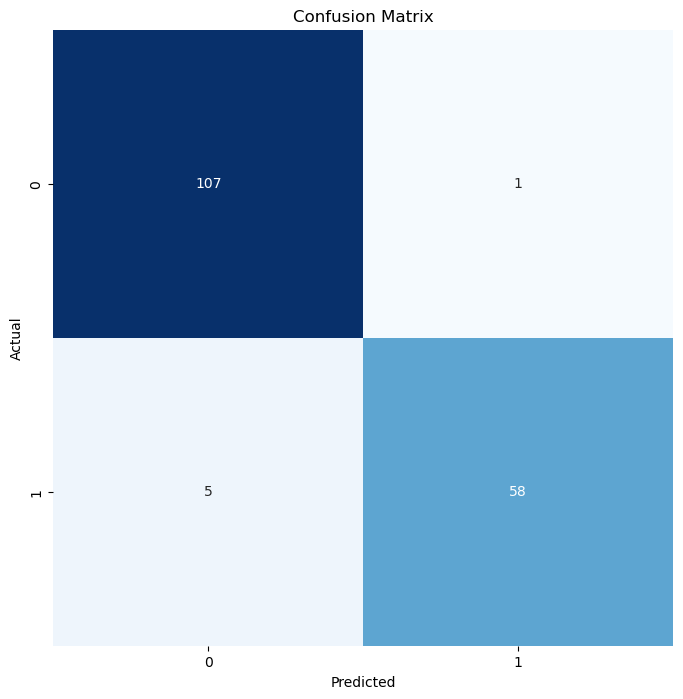

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [193]:
evaluate_model(lda,'LinearDiscriminantAnalysis', X_test, y_test)

# **Artificial Neural Network**

In [194]:
# Créer une instance de la classe RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Appliquer l'oversampling aux données d'entraînement
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

In [195]:
X_train_balanced.shape, X_test.shape, y_train_balanced.shape, y_test.shape

((498, 30), (171, 30), (498,), (171,))

In [196]:
# Création du pipeline de prétraitement des données
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

In [197]:
# Prétraitement des données
X_train_processed = preprocessor.fit_transform(X_train_balanced)
X_test_processed = preprocessor.transform(X_test)

In [198]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 

    plt.figure(figsize=(12, 8))
    fig, axs = plt.subplots(1, 2, figsize=(20,5))
    
    # Loss
    for l in loss_list:
        axs[0].plot(history.history[l], label='Train loss (' + str(str(format(history.history[l][-1], '.5f'))+')'))
    for l in val_loss_list:
        axs[0].plot(history.history[l], label='Validation loss (' + str(str(format(history.history[l][-1], '.5f'))+')'))
    
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend(loc='upper right')
    
    # Accuracy
    for l in acc_list:
        axs[1].plot(history.history[l], label='Train accuracy (' + str(format(history.history[l][-1], '.5f'))+')')
    for l in val_acc_list:
        axs[1].plot(history.history[l], label='Validation accuracy (' + str(format(history.history[l][-1], '.5f'))+')')
    
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(loc='lower right')
    
    plt.show()

In [199]:
# Création du modèle de réseau de neurones
model_ann = Sequential()
model_ann.add(Dense(units=128, activation='relu'))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid', input_dim=X.shape[1]))
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/1000
11/11 [==============================] - 1s 21ms/step - loss: 0.4159 - accuracy: 0.9109 - val_loss: 0.3094 - val_accuracy: 0.8867
Epoch 2/1000
11/11 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.9483 - val_loss: 0.2293 - val_accuracy: 0.8867
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.1317 - accuracy: 0.9626 - val_loss: 0.1850 - val_accuracy: 0.9267
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0981 - accuracy: 0.9741 - val_loss: 0.1577 - val_accuracy: 0.9333
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0811 - accuracy: 0.9713 - val_loss: 0.1403 - val_accuracy: 0.9333
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.0697 - accuracy: 0.9828 - val_loss: 0.1349 - val_accuracy: 0.9400
Epoch 7/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.0619 - accuracy: 0.9856 - val_loss: 0.1267 - val_accuracy: 0.9467
Epoch

<Figure size 1200x800 with 0 Axes>

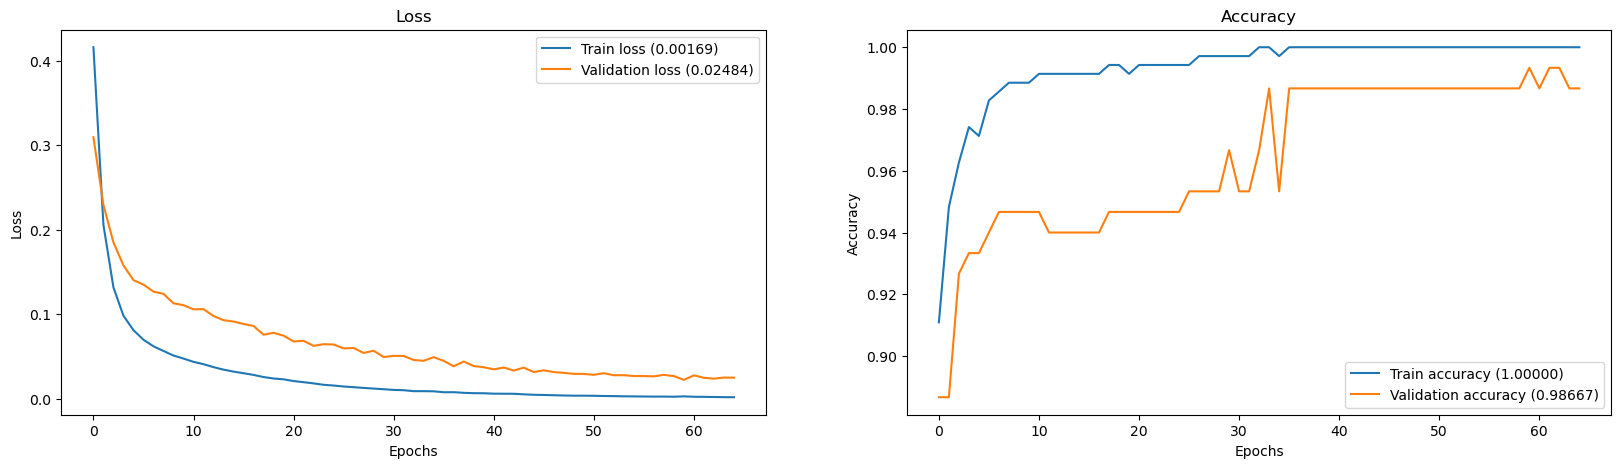

In [200]:
es = EarlyStopping(monitor='val_loss', patience=5)
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_ann.fit(X_train_processed, y_train_balanced, epochs=1000, validation_split=0.3, callbacks=[es])
plot_history(history)

In [201]:
# Obtenir les prédictions sur les données de test
y_pred = model_ann.predict(X_test_processed)

# Convertir les prédictions en classe binaire (0 ou 1)
y_pred = np.where(y_pred > 0.5, 1, 0)

6/6 [==============================] - 0s 2ms/step


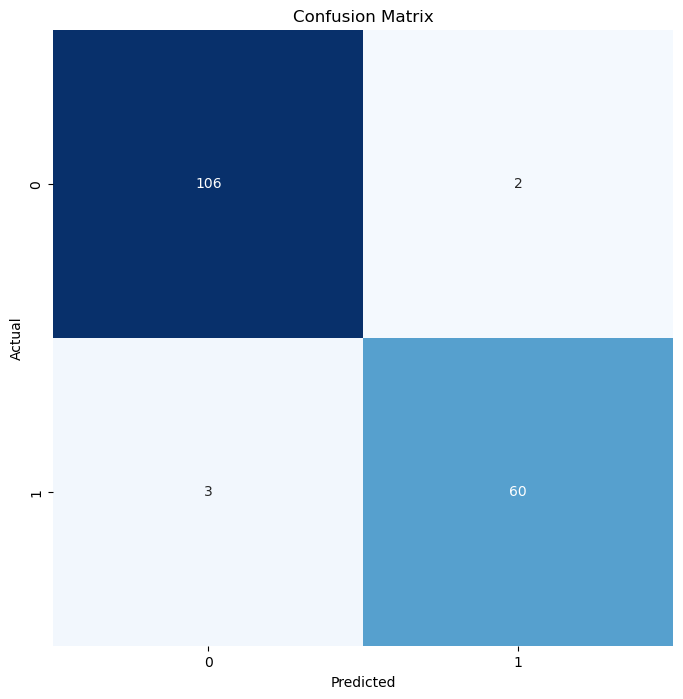

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [202]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
    
print("Classification Report:\n----------------------\n", clr)

In [203]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score : ", f1)

F1-score :  0.9707106475867088


In [204]:
mse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error : ", mse)

Mean Squared Error :  0.17099639201419234


In [205]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)

Mean Absolute Error :  0.029239766081871343


In [206]:
bas = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score : ", bas)

Balanced Accuracy Score :  0.966931216931217


# **Voting Classifier**

In [207]:
param_grid_vc = {
    'voting': ['hard', 'soft'],
    'weights': [[1,1], [2,1], [2,2]]
}

In [208]:
clf_vc = randomized_search_cv(VotingClassifier(estimators=[('model1', lr), ('model2', rf)]),
                              param_grid_vc, kfold ,X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [209]:
clf_vc

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=VotingClassifier(estimators=[('model1',
                                                           Pipeline(steps=[('preprocessor',
                                                                            ColumnTransformer(transformers=[('num',
                                                                                                             Pipeline(steps=[('standard_scaler',
                                                                                                                              RobustScaler())]),
                                                                                                             ['radius_mean',
                                                                                                              'texture_mean',
                                                                                                          

Balanced accuracy (VotingClassifier): 98.74%


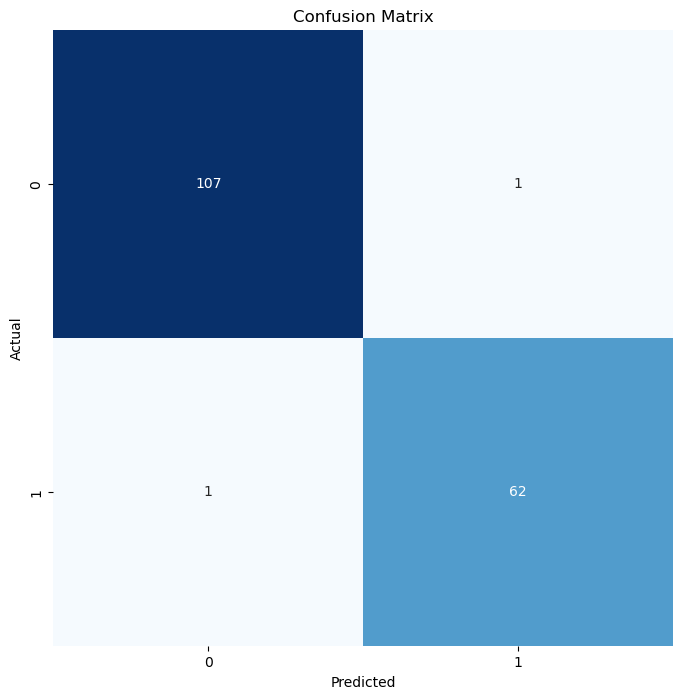

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



In [210]:
evaluate_model(clf_vc,'VotingClassifier', X_test, y_test)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

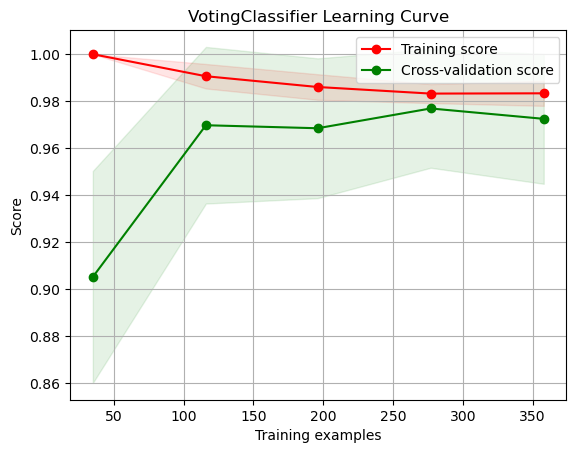

In [211]:
# Voting Classifier - Learning Curve 
plot_learning_curve(estimator=clf_vc, title="VotingClassifier Learning Curve",
                    X=X_train, y=y_train, cv=kfold)

In [212]:
# Modèles entraînés et leurs prédictions sur les données de test dans les listes suivantes :
models = [lr, neigh, rf, best_xgb, dtc, gbc, svc, lda, gnb, model_ann]
predictions = [lr.predict(X_test), neigh.predict(X_test),
               rf.predict(X_test), best_xgb.predict(X_test),
               y_pred, dtc.predict(X_test), gbc.predict(X_test),
              svc.predict(X_test), gnb.predict(X_test),
              lda.predict(X_test)]

# Calculez les courbes ROC pour chaque modèle et stockez les taux de faux positifs (fpr) et les taux de vrais positifs (tpr) dans des listes
fprs, tprs, aucs = [], [], []
for i, clf_model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test, predictions[i])
    roc_auc = auc(fpr, tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(roc_auc)

# Créez la figure Plotly
fig = go.Figure()

# Ajoutez les courbes ROC pour chaque modèle à la figure
for i in range(len(models)):
    fig.add_trace(go.Scatter(x=fprs[i], y=tprs[i], name=f'Model {i+1} (AUC={aucs[i]:.3f})', mode='lines'))

# Ajoutez la ligne en pointillés qui représente une prédiction aléatoire
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name='Random', mode='lines', line=dict(dash='dash')))

# Mettez à jour le titre et les étiquettes des axes
fig.update_layout(title='Receiver Operating Characteristic Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')

# Affichez la figure
fig.show(config=config)